<a href="https://colab.research.google.com/github/Hira1445/Hira_Khan/blob/main/image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

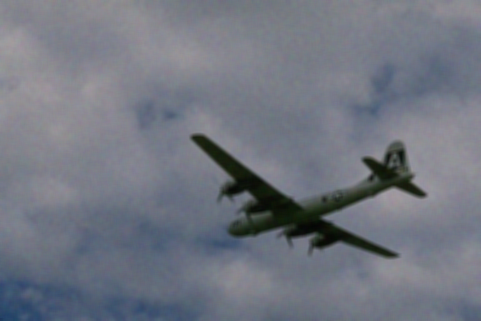

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
org = cv2.imread('/content/0000.png') # reads the image
rgb_org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
image = cv2.imread('/content/000.png') # reads the image
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

figure_size = 5 # the dimension of the x and y axis of the kernal.
img_mean = cv2.blur(image,(figure_size, figure_size))
rgb_mean = cv2.cvtColor(img_mean, cv2.COLOR_BGR2RGB)
#cv2_imshow(org)
cv2_imshow(img_mean)


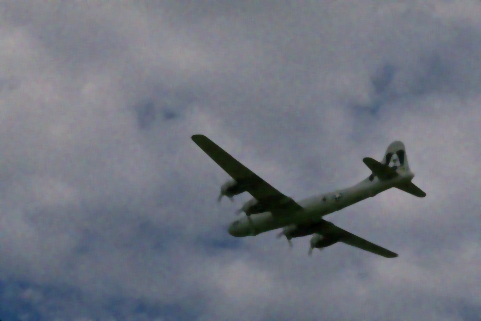

In [ ]:
img_median = cv2.medianBlur(image, 5) # Add median filter to image
cv2_imshow(img_median) # Display img with median filter
rgb_median = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)

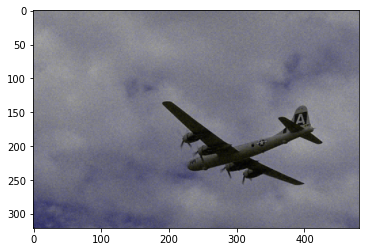

In [ ]:
import matplotlib.pyplot as plt
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise

orignal=skimage.io.imread('/content/000.png')

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(orignal, multichannel=True, average_sigmas=True)
wav_img = denoise_wavelet(orignal, sigma_est, rescale_sigma=True)

plt.imshow(wav_img)


In [ ]:

# MSE for MEAN
orgi = mean_squared_error(org,image)
m2= mean_squared_error(org,img_mean)
print ('MSE between orignal and noisy', orgi)
print ('MSE between Orignal and Mean fitlered', m2)
# MSE for Median
#med1 = mean_squared_error(image,img_median)
med2= mean_squared_error(org,img_median)
#print ('MSE between Noisy and Mean fitlered',med1)
print ('MSE between Orignal and Median fitlered', med2)
# MSE for Median
#w1 = mean_squared_error(orignal,wav_img)
w2= mean_squared_error(orignal,wav_img)
#print ('MSE between Noisy and Mean fitlered',w1)
print ('MSE between Orignal and Wavlet fitlered', w2)

MSE between orignal and noisy 99.62446486745552
MSE between Orignal and Mean fitlered 28.488744675660563
MSE between Orignal and Median fitlered 17.588163289097867
MSE between Orignal and Wavlet fitlered 15123.624690673467


In [ ]:
# SSIM for MEAN
m3 = ssim(org,image, data_range=image.max()-org.min(),multichannel=True)
m4 = ssim(org,img_mean, data_range=img_mean.max()-org.min(),multichannel=True)
print ('SSIM between orignal and noisy',m3)
print ('SSIM between Orignal and Mean fitlered', m4)
# SSIM for MEDIAN
#med3 = ssim(image,img_median, data_range=img_median.max()-image.min(),multichannel=True)
med4 = ssim(org,img_median, data_range=img_median.max()-org.min(),multichannel=True)
#print ('SSIM between Noisy and Mean fitlered',med3)
print ('SSIM between Orignal and Median fitlered', med4)
# SSIM for WAVLET
#w3 = ssim(orignal,wav_img, data_range=wav_img.max()-orignal.min(),multichannel=True)
w4 = ssim(org,wav_img, data_range=wav_img.max()-org.min(),multichannel=True)
#print ('SSIM between Noisy and Mean fitlered',w3)
print ('SSIM between Orignal and Wavlet fitlered',w4)


SSIM between orignal and noisy 0.34686343022824984
SSIM between Orignal and Mean fitlered 0.8604802036045278
SSIM between Orignal and Median fitlered 0.8322261943858821
SSIM between Orignal and Wavlet fitlered 4.6570547839504775e-05


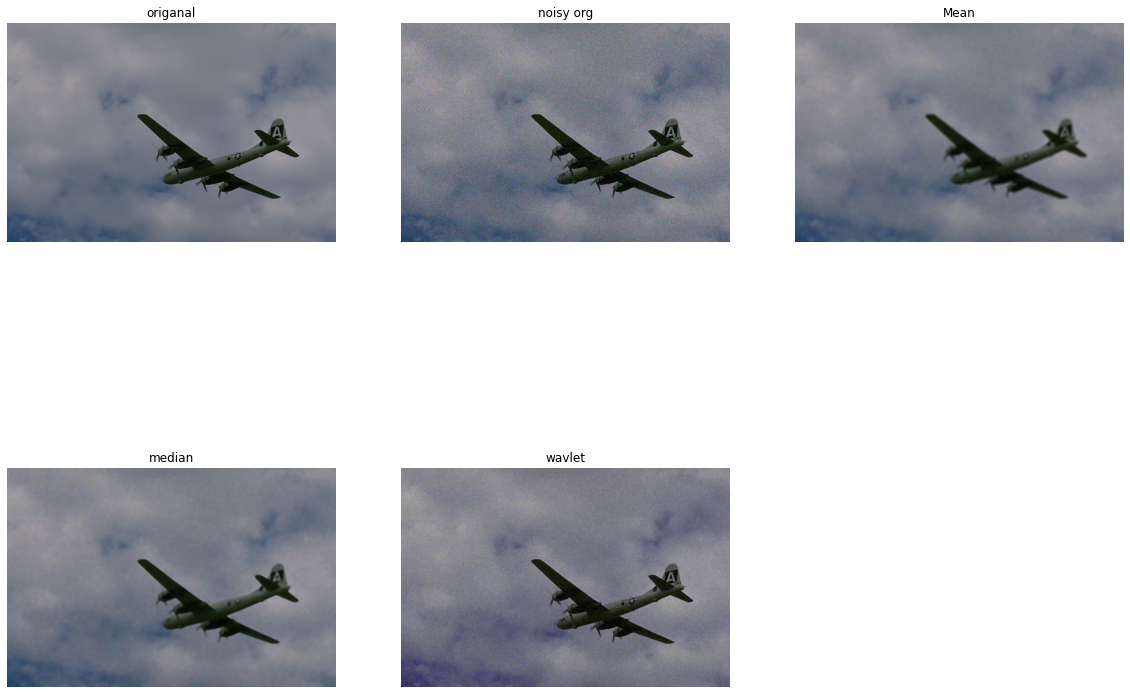

In [ ]:
import cv2
from matplotlib import pyplot as plt
rows = 2
columns = 3
# create figure
fig = plt.figure(figsize=(20, 15))
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(rgb_org)
plt.axis('off')
plt.title("origanal")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(rgb_image)
plt.axis('off')
plt.title("noisy org")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(rgb_mean)
plt.axis('off')
plt.title("Mean")

  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(rgb_median)
plt.axis('off')
plt.title("median")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(wav_img)
plt.axis('off')
plt.title("wavlet")

plt.savefig('resusult.png')


In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [ ]:
model=tf.keras.applications.vgg16.VGG16(
    
    include_top=False, weights='imagenet',
    input_shape=(96,96,3)
)

model.summary()

58900480/58889256 [==============================] - 63s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                             

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      
      model.input,
      model.get_layer(layer_name).output  
  )

In [ ]:
get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_image(image, title='random'):
  image=image - tf.math.reduce_min(image)
  image=image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

In [ ]:
def visualize_filter(layer_name,f_index=None, iters=50):
  submodel=get_submodel(layer_name)
  num_filters=submodel.output.shape[-1]

  if f_index is None:
    f_index=random.randint(0,num_filters-1)
  assert num_filters>f_index,'f_index is out of bounds'

  image='content/8.jpg'
  verbose_step=int(iters/10)

  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out=submodel(tf.expand_dims(image,axis=0))[:,:,:,f_index]
      loss=tf.math.reduce_mean(out)
    grads=tape.gradient(loss,image)
    grads=tf.math.l2_normalize(grads)
    image+=grads*10

    if (i+1)% verbose_step == 0:
      print(f'Iteration:{i+1},Loss:{loss.numpy():.4f}')

  plot_image(image,f'{layer_name},{f_index}')

In [ ]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


In [ ]:
from skimage import io
im_path = 'dataset/8.jpg'

In [ ]:
import cv2
img = cv2.imread("dataset/8.jpg")
cv2.imshow("Denoised_Image", img)
cv2.waitKey(0)

-1